In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import os

In [3]:
# Load news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display basic info
print(news_df.info())
print(news_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://w

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


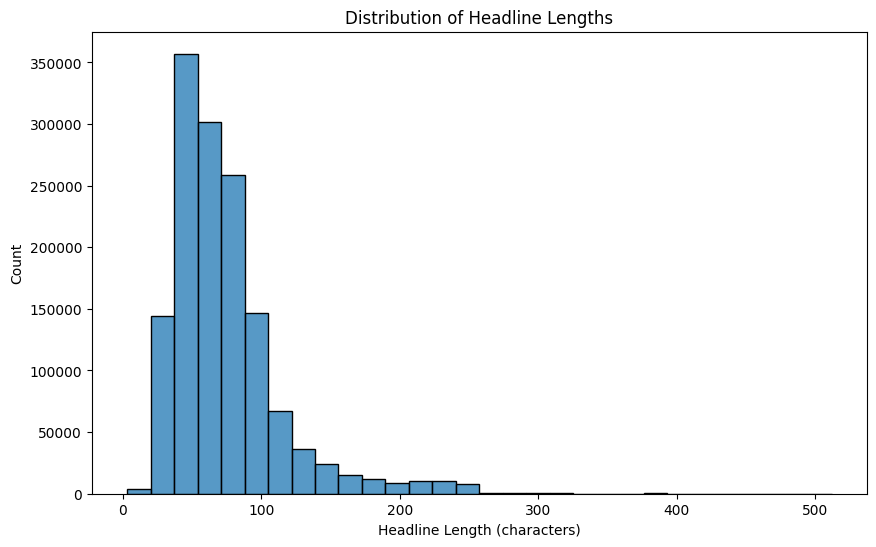

In [4]:
# Descriptive Statistics: Headline Length
news_df['headline_length'] = news_df['headline'].apply(len)
print(news_df['headline_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline_length'], bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Count')
plt.savefig('../plots/headline_length_distribution.png')
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


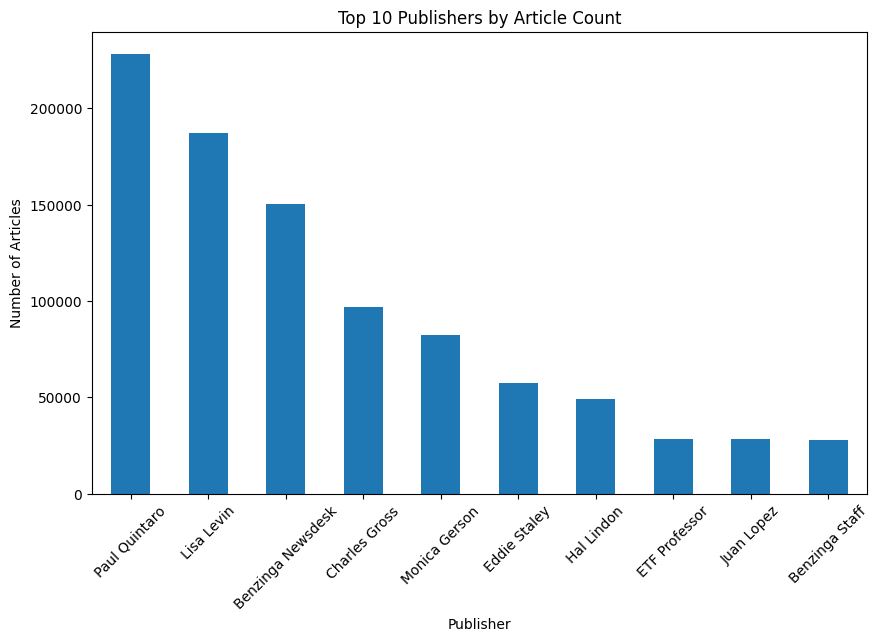

In [5]:
# Publisher Analysis
publisher_counts = news_df['publisher'].value_counts()
print(publisher_counts.head(10))

plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('../plots/top_publishers.png')
plt.show()

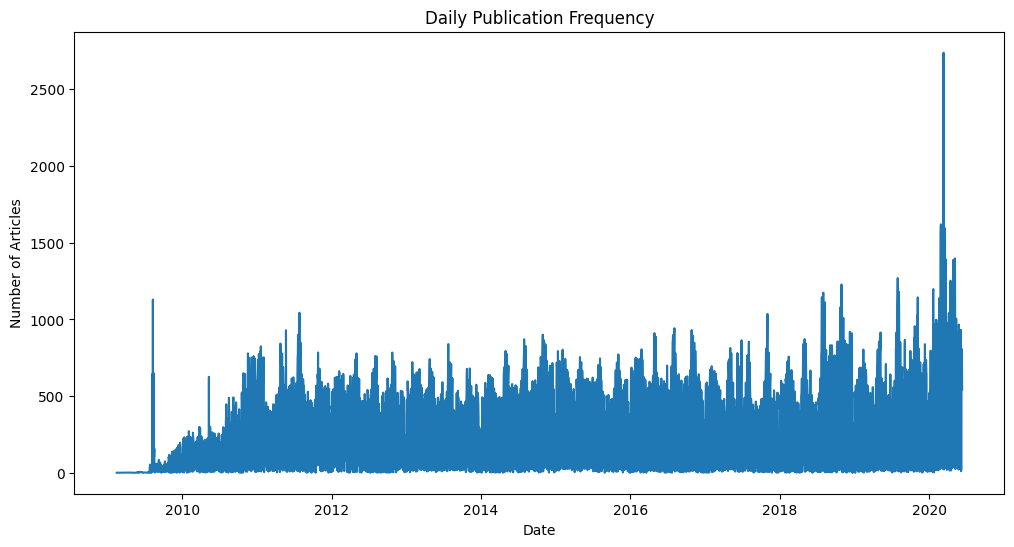

In [6]:
# Time Series Analysis
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce', utc=True)
if news_df['date'].isna().any():
    print(f"Warning: {news_df['date'].isna().sum()} rows with invalid dates dropped.")
    news_df = news_df.dropna(subset=['date'])
news_df['date_only'] = news_df['date'].dt.date
daily_counts = news_df.groupby('date_only').size()

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.savefig('../plots/daily_publication_frequency.png')
plt.show()

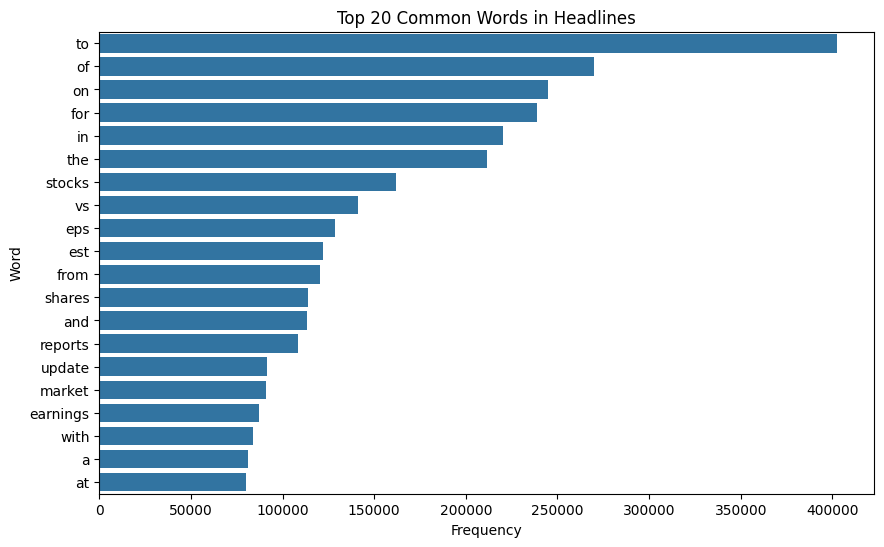

In [7]:
# Text Analysis: Common Keywords
news_df['tokens'] = news_df['headline'].apply(word_tokenize)
all_words = [word.lower() for tokens in news_df['tokens'] for word in tokens if word.isalpha()]
word_freq = Counter(all_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words)
plt.title('Top 20 Common Words in Headlines')
plt.savefig('../plots/common_words.png')
plt.show()

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


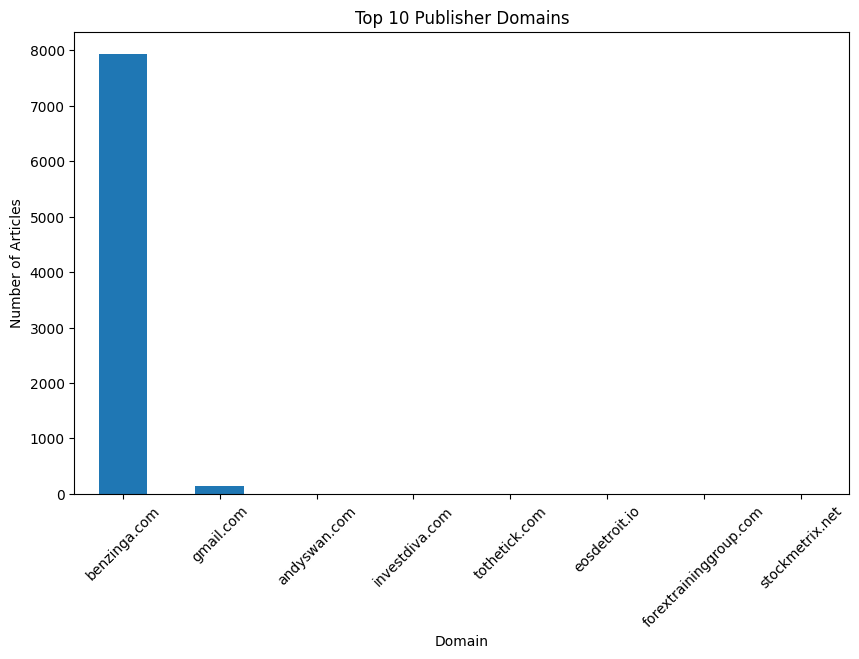

In [8]:
# Publisher Domain Analysis
news_df['domain'] = news_df['publisher'].str.extract(r'@([\w\.-]+)')
domain_counts = news_df['domain'].value_counts()
print(domain_counts.head(10))

plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publisher Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.savefig('../plots/top_domains.png')
plt.show()